## Project 2: **RECOGNIZING HANDWRITTEN DIGITS USING SCIKIT-LEARN** 

●**Dataset Link:** https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

●**Goal:** Our goal is to involve predicting a numeric value, and then reading and interpreting an image that uses a handwritten font.
So even in this case you will have an estimator with the task of learning through a fit() function, and once it has reached a degree of predictive capability (a model sufficiently valid), it will produce a prediction with the predict() function. Then we
will discuss the training set and validation set, created this time from a series of images.

*You can choose a smaller training set and different range for validation and get 100% accurate predictions, but this may not be the case at all times. 
Run for at-least 3 cases , each case for different range of training and validation sets*.

**Import the required libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

**Describing the datasets**

In [2]:
#Load and read the dataset
from sklearn import datasets
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
digits.data.shape

(1797, 64)

In [7]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
digits.target.size

1797

**Visualizing data**

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

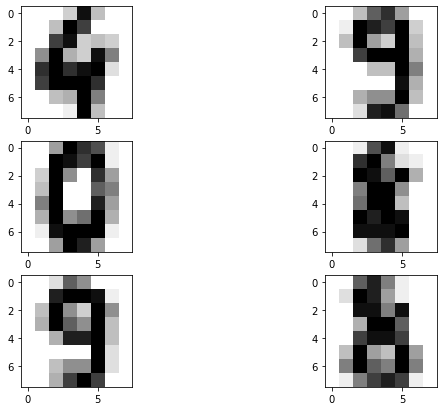

In [10]:
plt.figure(figsize=(10,7))
plt.subplot(321)
plt.imshow(digits.images[1791], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(322)
plt.imshow(digits.images[1792], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(323)
plt.imshow(digits.images[1793], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(324)
plt.imshow(digits.images[1794], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(325)
plt.imshow(digits.images[1795], cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(326)
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')

**Preparing data**

In [11]:
n_samples = len(digits.images)
n_samples

1797

In [12]:
data = digits.images.reshape((n_samples, -1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

**Splitting Data into Train and Test Method**

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.01, random_state=0)

**Classifying the Model**

1.**Support Vector Machine**

In [14]:
from sklearn import svm, metrics
svc_classifier = svm.SVC(gamma=0.001, C = 100.)
svc_classifier

SVC(C=100.0, gamma=0.001)

In [15]:
svc_classifier.fit(x_train, y_train)

SVC(C=100.0, gamma=0.001)

In [16]:
svc_y_pred = svc_classifier.predict(x_test)
svc_y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

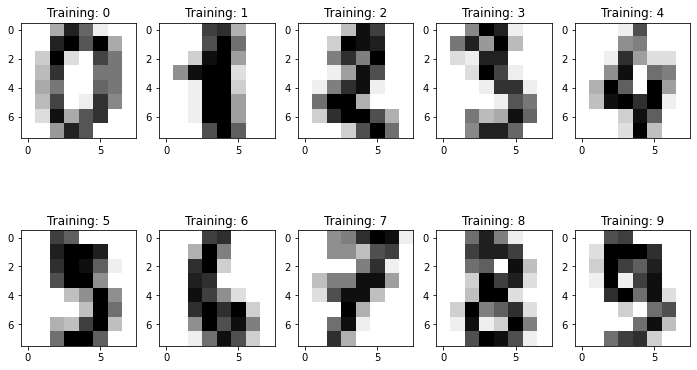

In [17]:
plt.figure(figsize=(12,7))
images_and_labels = list(zip(digits.images, digits.target))

for index, (images, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(images, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

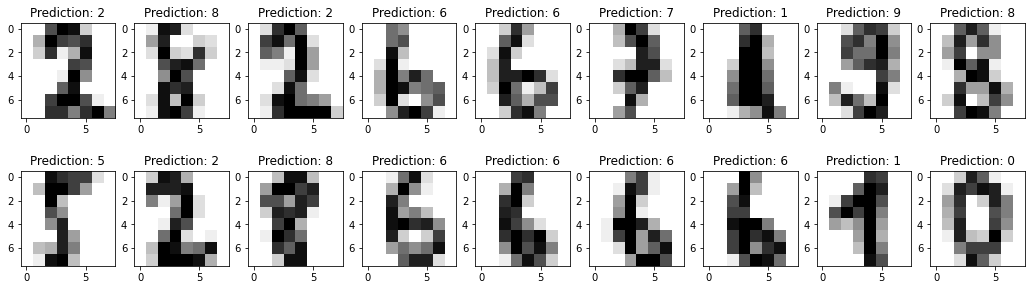

In [18]:
images_and_predictions = list(zip(x_test,svc_y_pred))
plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


Classification report for Support Vector Machine Classifier SVC(C=100.0, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Confusion matrix of Support Vector Machine Classifier:
[[1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 1]]

Accuracy of the Support Vector Machine Classifier 

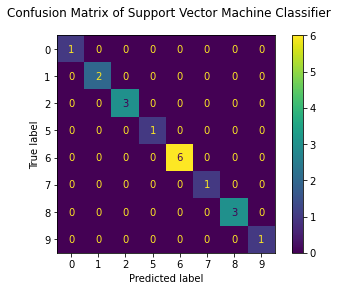

In [19]:
print("\nClassification report for Support Vector Machine Classifier %s:\n%s\n" % (svc_classifier, metrics.classification_report(y_test, svc_y_pred)))
disp = metrics.plot_confusion_matrix(svc_classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix of Support Vector Machine Classifier")
print("\nConfusion matrix of Support Vector Machine Classifier:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Support Vector Machine Classifier Algorithm: ", svc_classifier.score(x_test, y_test))
plt.show()

2.**Gaussian Naive Bayes**

In [20]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(x_train, y_train)

GaussianNB()

In [21]:
GNB_y_pred = GNB_classifier.predict(x_test)
GNB_y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

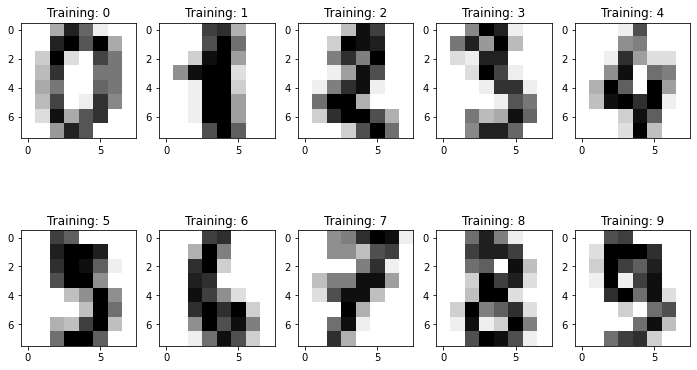

In [22]:
plt.figure(figsize=(12,7))
images_and_labels = list(zip(digits.images, digits.target))

for index, (images, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(images, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

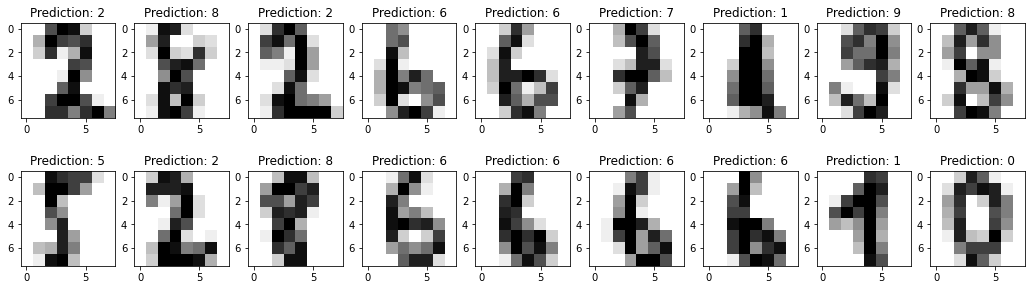

In [23]:
images_and_predictions = list(zip(x_test,GNB_y_pred))
plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


Classification report for Gaussian Naive Bayes Classifier GaussianNB():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Confusion matrix of Gaussian Naive Bayes Classifier:
[[1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 1]]

Accuracy of the Gaussian Naive Bayes Classifier Algorithm:  1.0


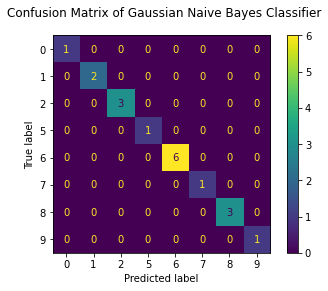

In [24]:
print("\nClassification report for Gaussian Naive Bayes Classifier %s:\n%s\n" % (GNB_classifier, metrics.classification_report(y_test, GNB_y_pred)))
disp = metrics.plot_confusion_matrix(GNB_classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix of Gaussian Naive Bayes Classifier")
print("\nConfusion matrix of Gaussian Naive Bayes Classifier:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the Gaussian Naive Bayes Classifier Algorithm: ", GNB_classifier.score(x_test, y_test))
plt.show()

3.**K Nearest Neighbours (KNN)**

In [25]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
KNN_y_pred = KNN_classifier.predict(x_test)
KNN_y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

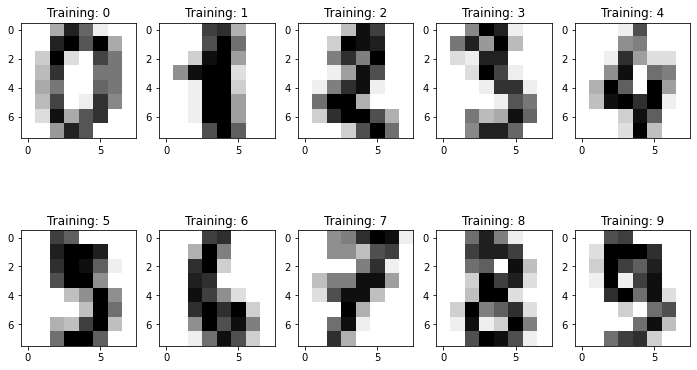

In [27]:
plt.figure(figsize=(12,7))
images_and_labels = list(zip(digits.images, digits.target))

for index, (images, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(images, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

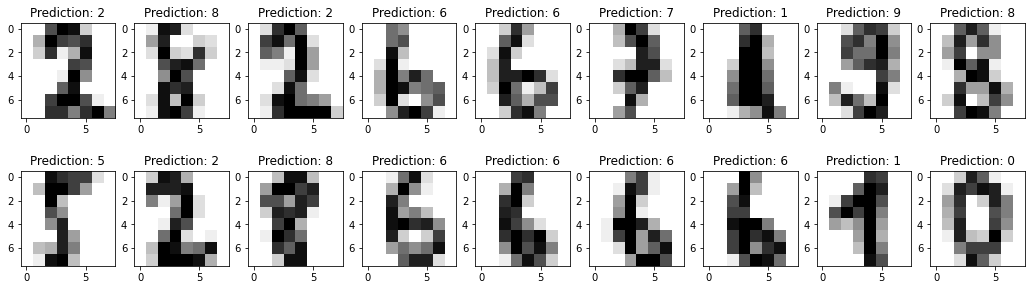

In [28]:
images_and_predictions = list(zip(x_test,KNN_y_pred))
plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)


Classification report for K Nearest Neighbours Classifier KNeighborsClassifier(metric='euclidean'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



Confusion matrix of K Nearest Neighbours Classifier:
[[1 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 1]]

Accuracy of the K Nearest Neighbours Cl

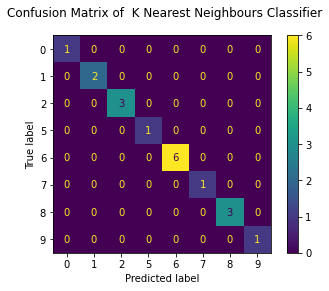

In [29]:
print("\nClassification report for K Nearest Neighbours Classifier %s:\n%s\n" % (KNN_classifier, metrics.classification_report(y_test, KNN_y_pred)))
disp = metrics.plot_confusion_matrix(KNN_classifier, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix of  K Nearest Neighbours Classifier")
print("\nConfusion matrix of K Nearest Neighbours Classifier:\n%s" % disp.confusion_matrix)
print("\nAccuracy of the K Nearest Neighbours Classifier Algorithm: ", KNN_classifier.score(x_test, y_test))
plt.show()

**Observation**

In [30]:
print("Total overall accuracies of the Classifier Algorithms are--- ")
print("\nAccuracy of the Support Vector Machine Classifier Algorithm: ", svc_classifier.score(x_test, y_test))
print("Accuracy of the Gaussian Naive Bayes Classifier Algorithm: ", GNB_classifier.score(x_test, y_test))
print("Accuracy of the K Nearest Neighbours Classifier Algorithm: ", KNN_classifier.score(x_test, y_test))

Total overall accuracies of the Classifier Algorithms are--- 

Accuracy of the Support Vector Machine Classifier Algorithm:  1.0
Accuracy of the Gaussian Naive Bayes Classifier Algorithm:  1.0
Accuracy of the K Nearest Neighbours Classifier Algorithm:  1.0


**Conclusion**

From this analysis, I conclude that **I predicted a numeric value, and then read and interpreted an image that uses a handwritten font. I trained and predicted the images and used at-least three different classifiers for validation and got 100% accurate predictions**.